In [1]:
# Setting paths
import sys,os
import pathlib
sys.path.insert(0,os.path.expanduser('~/caryocar'))
sys.path.insert(0,os.path.abspath('..'))

In [2]:
# Building the networks from data
from setupmodels import *

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as mpl
import seaborn as sns
import scipy as scp 
import powerlaw

import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-paper')
sns.set_color_codes('deep')

%matplotlib inline

### Plotting CWN Degree distribution

In [4]:
def logarithmicBinning(g, num_bins, density=False):
    k_vals = [ kval for kval in dict(g.degree()).values() if kval>0 ]
    max_k, min_k = max(k_vals)+1, min(k_vals)
    
    bins = np.logspace(start=np.log10(min_k),stop=np.log10(max_k),num=num_bins)
    y,x = np.histogram(k_vals, bins=bins, density=density)
    
    return x,y

In [5]:
fit = powerlaw.Fit(data=[kval for kval in dict(cwn.degree()).values() if kval>0],discrete=True)

Calculating best minimal value for power law fit
/home/pedro/anaconda3/envs/tese_lncc/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [6]:
alpha=fit.power_law.alpha

alpha, fit.xmin

/home/pedro/anaconda3/envs/tese_lncc/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(2.2020691084877004, 3.0)

In [7]:
f_powerlaw = lambda k,alpha,b0: b0 * k**(-alpha)

Text(0,0.5,'$p_k$')

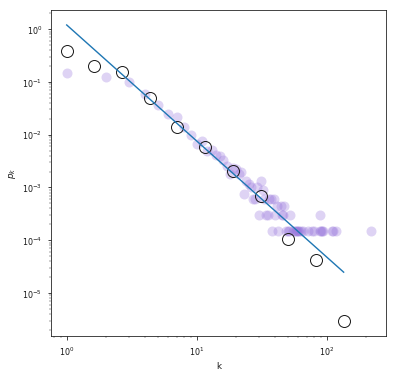

In [8]:
plt.figure(figsize=(6,6))


x,y = logarithmicBinning(cwn,12,density=True)

# plot linear binning
linBin_n = nx.degree_histogram(cwn)
linBin_k = range(len(linBin_n))
x_lin,y_lin = zip(*[ (k,v) for k,v in list(zip(linBin_k,list(map(lambda n: n/sum(linBin_n), linBin_n)))) if v>0 ])
plt.plot(x_lin,y_lin,marker='o',ls='', c='mediumpurple', alpha=0.3, ms=10)

# plot log binning
plt.plot(x[:-1],y,marker='o',ls='',  color='none', markeredgecolor='k', markeredgewidth=1, ms=12)

# plot powerlaw
plt.plot(x[:-1],f_powerlaw(x[:-1],alpha,1.2))


plt.yscale('log')
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('$p_k$')

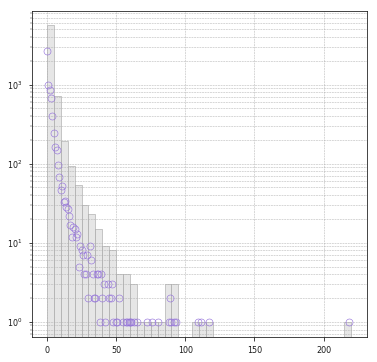

In [9]:
plt.figure(figsize=(6,6))

# plot linear binning 
khist = nx.degree_histogram(cwn)
khist = zip(range(len(khist)),khist)
x,y = zip(*list(khist))
plt.plot(x,y,marker='o',ls='', c='mediumpurple', ms=7,markeredgecolor='mediumpurple',markerfacecolor='none',markeredgewidth=.6)


# Underlying hystogram
khist = nx.degree_histogram(cwn)
khist = [ k for k,cnt in zip(range(len(khist)),khist) for i in range(cnt) ] # expanded

binsize=5
max_k=khist[-1]
start=0
binseq = range(start,max_k,binsize) if max_k%binsize==0 else range(start, max_k+binsize,binsize)

plt.hist(khist,bins=list(binseq), log=True, lw=.5, color='.9',ec='.6')
plt.grid(which='both',ls='--',lw=.5)

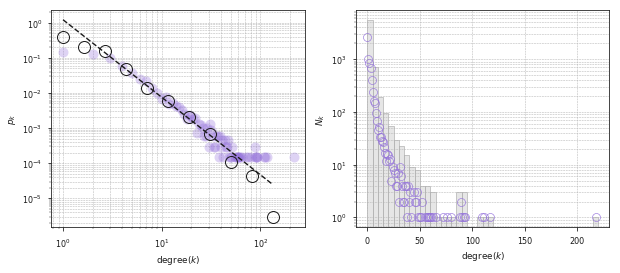

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

# Ax 1
x,y = logarithmicBinning(cwn,12,density=True)

# plot linear binning
linBin_n = nx.degree_histogram(cwn)
linBin_k = range(len(linBin_n))
x_lin,y_lin = zip(*[ (k,v) for k,v in list(zip(linBin_k,list(map(lambda n: n/sum(linBin_n), linBin_n)))) if v>0 ])
ax1.plot(x_lin,y_lin,marker='o',ls='', c='mediumpurple', alpha=0.3, ms=10)

# plot log binning
ax1.plot(x[:-1],y,marker='o',ls='',  color='none', markeredgecolor='k', markeredgewidth=1, ms=12)

# plot powerlaw
ax1.plot(x[:-1],f_powerlaw(x[:-1],alpha,1.2), ls='--', color='k')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('degree($k$)')
ax1.set_ylabel('$p_k$')


# Ax 2
# plot linear binning 
khist = nx.degree_histogram(cwn)
khist = zip(range(len(khist)),khist)
x,y = zip(*list(khist))
ax2.plot(x,y,marker='o',ls='', c='mediumpurple', ms=8,markeredgecolor='mediumpurple',markerfacecolor='none',markeredgewidth=.6)

# Underlying hystogram
khist = nx.degree_histogram(cwn)
khist = [ k for k,cnt in zip(range(len(khist)),khist) for i in range(cnt) ] # expanded
binsize=5
max_k=khist[-1]
start=0
binseq = range(start,max_k,binsize) if max_k%binsize==0 else range(start, max_k+binsize,binsize)
ax2.hist(khist,bins=list(binseq), log=True, lw=.5, color='.9',ec='.6')
ax2.grid(which='both',ls='--',lw=.5)

ax2.set_yscale('log')
ax2.set_xlabel('degree($k$)')
ax2.set_ylabel('$N_k$')
ax2.grid(which='both',ls='--',lw=.5,color='.7')
ax1.grid(which='both',ls='--',lw=.5,color='.7')

#fig.savefig('cwn_degree_dist.pdf', dpi=92, bbox_inches='tight')